In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import os

# 1. Loading and browser data

In [3]:
# Importing the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
# Take a look at the overview of the datasets
train.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
1609,e,x,y,e,t,n,f,c,b,n,...,g,g,p,w,o,p,k,v,d,2291
1023,e,f,f,n,f,n,f,w,b,h,...,w,w,p,w,o,e,k,a,g,1450
2265,e,f,y,g,t,n,f,c,b,n,...,p,p,p,w,o,p,n,v,d,3213
5447,e,x,f,w,f,n,f,w,b,p,...,w,w,p,w,t,p,w,s,g,7823
2951,p,x,f,p,f,c,f,w,n,n,...,w,w,p,w,o,p,n,v,d,4199


In [5]:
test.sample(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
389,b,s,y,t,l,f,c,b,n,e,...,w,w,p,w,o,p,k,s,m,1318
1190,x,y,g,f,f,f,c,b,h,e,...,n,n,p,w,o,l,h,y,p,4024
1010,f,y,n,t,n,f,c,b,n,t,...,w,w,p,w,o,p,k,y,d,3422
2438,k,s,n,f,f,f,c,n,b,t,...,p,w,p,w,o,e,w,v,l,8028
419,x,s,g,f,n,f,w,b,h,t,...,w,w,p,w,o,e,n,s,g,1418


# 2. EDA for missing values

In [6]:
print("The shape of the train data is (row, column):" + str(train.shape))
print(train.info())
print("The shape of the test data is (row, column):" + str(test.shape))
print(test.info())

The shape of the train data is (row, column):(5657, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 24 columns):
class                       5657 non-null object
cap-shape                   5657 non-null object
cap-surface                 5657 non-null object
cap-color                   5657 non-null object
bruises                     5657 non-null object
odor                        5657 non-null object
gill-attachment             5657 non-null object
gill-spacing                5657 non-null object
gill-size                   5657 non-null object
gill-color                  5657 non-null object
stalk-shape                 5657 non-null object
stalk-root                  5657 non-null object
stalk-surface-above-ring    5657 non-null object
stalk-surface-below-ring    5657 non-null object
stalk-color-above-ring      5657 non-null object
stalk-color-below-ring      5657 non-null object
veil-type                   5657 non-null object
veil

In [9]:
# Save the id in advance in order to submit later
trainId = train.Id
testId = test.Id
# I will drop Id because for it will not be used for our data
# train.drop(['Id], axis=1, inplace=True)
# test.drop(['Id], axis=1, inplace=True)
print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 24 columns):
class                       5657 non-null object
cap-shape                   5657 non-null object
cap-surface                 5657 non-null object
cap-color                   5657 non-null object
bruises                     5657 non-null object
odor                        5657 non-null object
gill-attachment             5657 non-null object
gill-spacing                5657 non-null object
gill-size                   5657 non-null object
gill-color                  5657 non-null object
stalk-shape                 5657 non-null object
stalk-root                  5657 non-null object
stalk-surface-above-ring    5657 non-null object
stalk-surface-below-ring    5657 non-null object
stalk-color-above-ring      5657 non-null object
stalk-color-below-ring      5657 non-null object
veil-type                   5657 non-null object
veil-color                  5657 non-null object
ring-number

# 3. Visualization and Feature Relations

## 3a. cap-shape and class

In [13]:
train['cap-shape'].value_counts()

x    2575
f    2205
k     553
b     299
s      23
c       2
Name: cap-shape, dtype: int64

In [15]:
train['class'].value_counts()

e    2956
p    2701
Name: class, dtype: int64

In [ ]:
# Encode class
for i in range(len(train['class'])):
    if train['class'][i] == 'e':
        train['class'][i] = 1
    else:
        train['class'][i] = 0

ValueError: Neither the `x` nor `y` variable appears to be numeric.

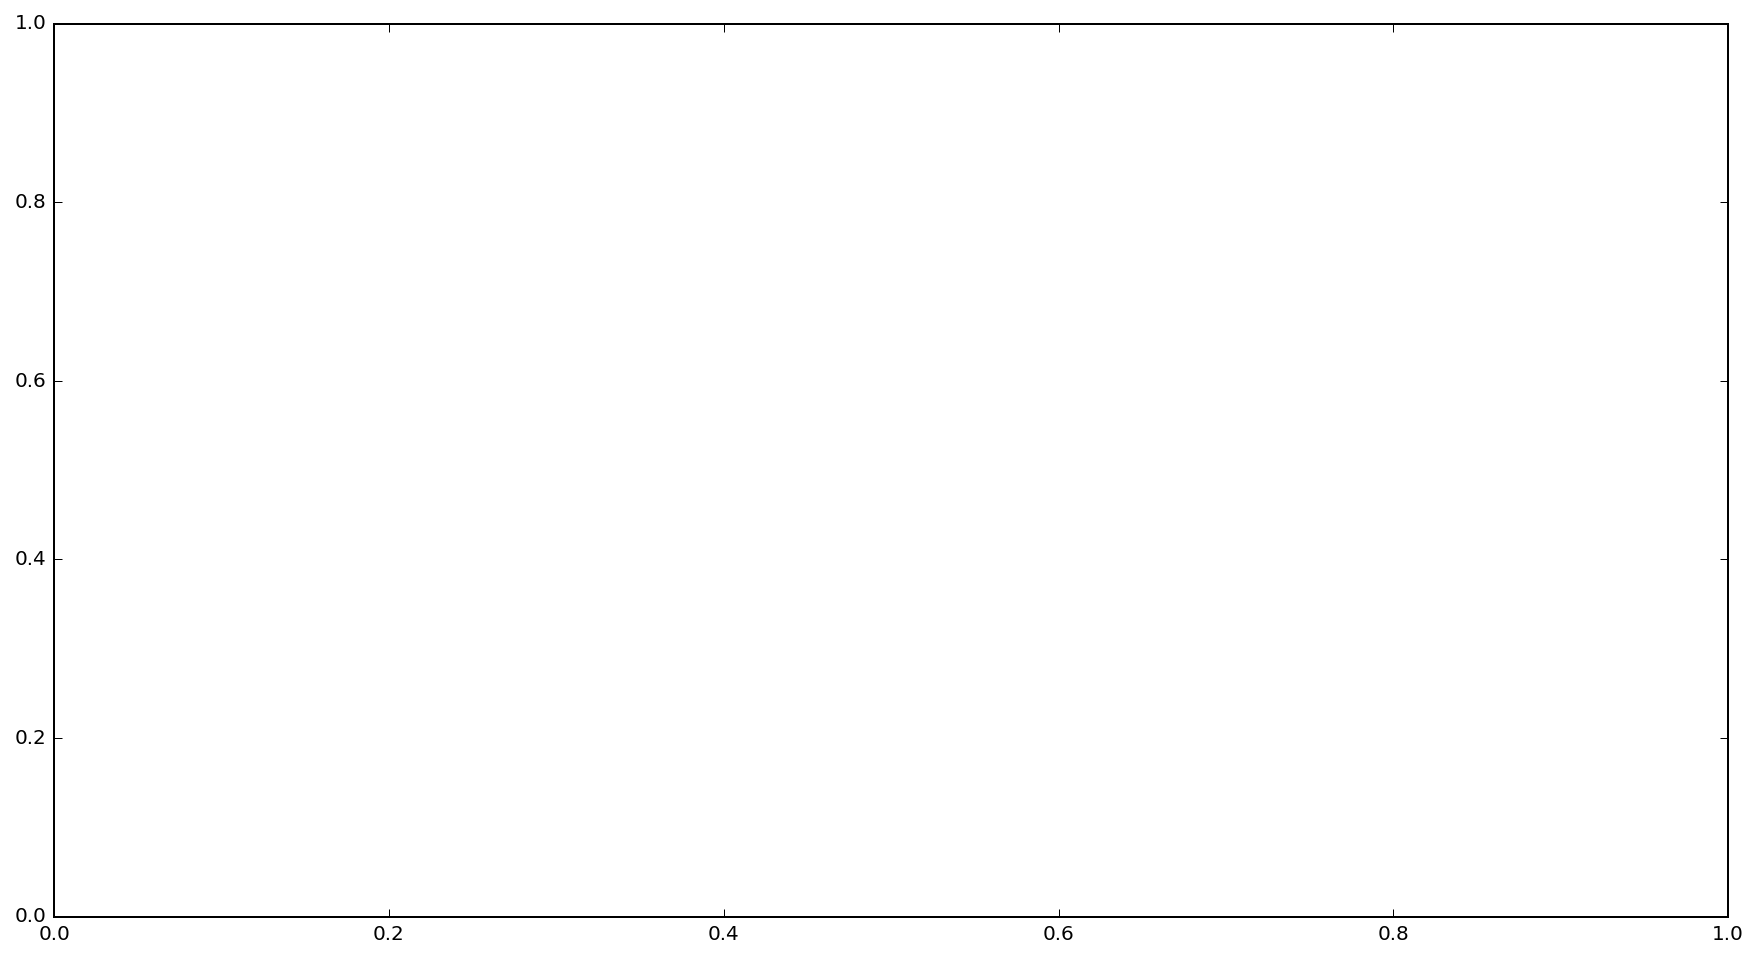

In [16]:
pal = {'x':"green", 'f':"Pink", 'k':"blue", 'b':"red", 's':"yellow", 'c':"orange"}
plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = "cap-shape", y = "class", data=train, palette = pal, linewidth=2)
plt.title("e/p class cap-shape Distribution", fontsize = 25)
plt.ylabel("% of e", fontsize = 15)
plt.xlabel("cap-shape", fontsize = 15);